In [3]:
#!/usr/bin/env python3

import pandas as pd

import matplotlib.pyplot as plt

# https://stackoverflow.com/questions/39215202/matplotlib-geopandas-plot-multiple-layers-control-figsize
# https://stackoverflow.com/questions/36367986/how-to-make-inline-plots-in-jupyter-notebook-larger
# https://erdatadoc.com/2016/07/14/jupyter-notebook-matplotlib-figure-display-options-and-pandas-set_option-optimization-tips/
# plt.rcParams['figure.figsize'] = [10, 20]

# display plots inside jupyter
%matplotlib inline

import geo
import malaria_scraper


# Create map dataframe

In [4]:
df_map = geo.get_map_df()
print(df_map.dtypes)
print(len(df_map))
# 177
# print(df_map.describe)
#df_map.head()

pop_est       float64
continent      object
country        object
iso_a3         object
gdp_md_est    float64
geometry       object
dtype: object
177


In [5]:
# save iso_a3 and country to file. TODO: add iso_a3 to df_malaria to use as merge key
df_iso_a3 = df_map.iloc[:, 2:4]
df_iso_a3
df_iso_a3.to_csv('./data/df_iso_a3.csv')

# Create country malaria dataframe

In [6]:
df_malaria = malaria_scraper.get_dataframe_all_countries()
print(len(df_malaria))
# 241
df_malaria.tail()

241


,country,areas_with_malaria,estimated_risk
2,West Bank,None,none
3,Western Sahara,Rare cases,no data
0,Yemen,"All areas at altitudes below 2,000 m (6,562 ft...",low
0,Zambia,All,moderate
1,Zimbabwe,All,moderate


# Merge malaria into GeoDataFrame

In [7]:
df_map = pd.merge(left=df_map, right=df_malaria, how='inner', on='country', sort=True)
# use left to see country names that may be missing/different in df_malaria
# df_map = pd.merge(left=df_map, right=df_malaria, how='left', on='country', sort=True)

# df_map.iloc[35:40]

pd.set_option('display.max_rows', 200)
df_map

,pop_est,continent,country,iso_a3,gdp_md_est,geometry,areas_with_malaria,estimated_risk
0,2.840000e+07,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,...",AprilâDecember in all areas at altitudes bel...,moderate
1,3.639453e+06,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,...",None,none
2,3.417819e+07,Africa,Algeria,DZA,232900.0,"POLYGON ((11.99950564947161 23.47166840259645,...",None,none
3,1.279929e+07,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...,All,high
4,3.802000e+03,Antarctica,Antarctica,ATA,760.4,(POLYGON ((-59.57209469261153 -80.040178725096...,None,none
5,4.091358e+07,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...,None,none
6,2.967004e+06,Asia,Armenia,ARM,18770.0,"POLYGON ((43.58274580259273 41.09214325618257,...",None,none
7,2.126264e+07,Oceania,Australia,AUS,800200.0,(POLYGON ((145.3979781434948 -40.7925485166058...,None,none
8,8.210281e+06,Europe,Austria,AUT,329500.0,"POLYGON ((16.97966678230404 48.12349701597631,...",None,none
9,8.238672e+06,Asia,Azerbaijan,AZE,77610.0,"(POLYGON ((45.0019873390568 39.7400035670496, ...",None,none


# Add estimated_risk_int for use in chloropleth map

In [8]:
# estimated_risk_int is for plotting color only
# aside from estimated_risk == 'no data', remaining values are ordinal but not interval or ratio
# https://www.mymarketresearchmethods.com/types-of-data-nominal-ordinal-interval-ratio/
df_map['estimated_risk_int'] = df_map['estimated_risk'].map({'no data': -1, 'none': 0, 'very low': 1, 'low': 2, 'moderate': 3, 'high': 4})
#df_map['estimated_risk'].values

# Plot chloropleth map of estimated malaria risk for US travelers
http://geopandas.org/mapping.html

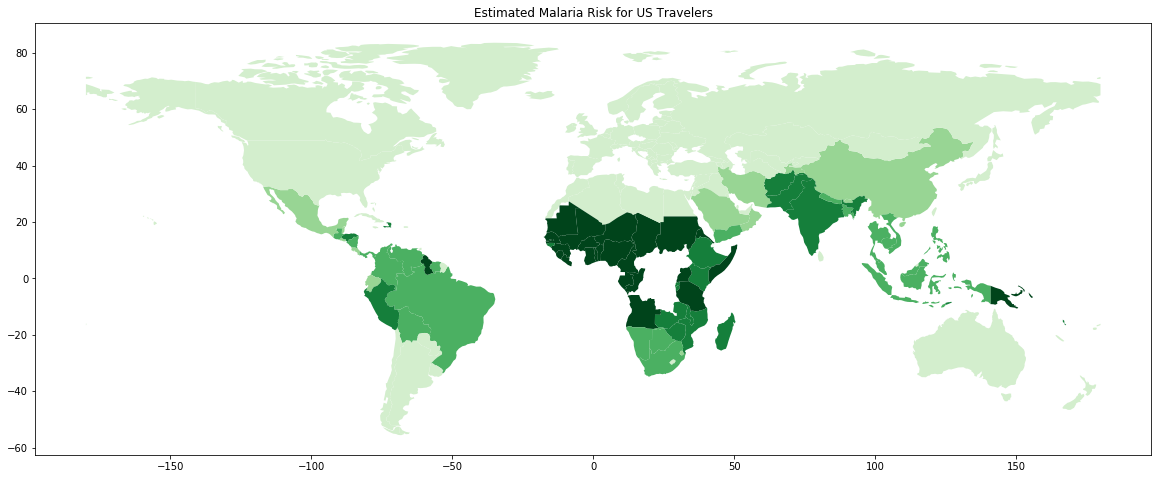

In [9]:
# don't show Antarctica
# cx coordinate based indexing slice by longitude, latitude
df_map = df_map.cx[:, -60:90]

cmap = 'Greens'
num_colors = 6
vmin=-1
vmax=4

# https://stackoverflow.com/questions/39215202/matplotlib-geopandas-plot-multiple-layers-control-figsize
figsize = (20, 20)
fig, ax = plt.subplots(1, 1, figsize=figsize)
ax.set_title('Estimated Malaria Risk for US Travelers')

df_map.plot(column='estimated_risk_int', cmap=cmap, ax=ax, k=num_colors, legend=False, vmin=vmin, vmax=vmax)

# TODO: Consider if can fix data. merge, assumptions or appearance for several African countries which appear white.